### Exploratory Data Analysis

### Data Pre-Processing

In [212]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd

df_matches = pd.read_csv("matches.csv")
df_matches.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN


In [213]:
df_deliveries = pd.read_csv("deliveries.csv")
df_deliveries.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN


In [214]:
print(df_matches.shape)
print(df_deliveries.shape)

(756, 18)
(179078, 21)


In matches data frame columns like umpire1,umpire2,umpire3 are not useful because these days they are using technology. So we cant decide which umpire is more useful for predicting anything related to match.

Date is also not useful because we already have season column which is also almost equal to date.

City and venue also not important features for this year IPL. Because IPL2020 is happening in UAE, only 2014 ipl was happened in UAE that to half season. But i am removing only venue it almost equal to city feature.

'Result' feature is almost equal to 'winner' feature. So i am dropping result column also.

In [215]:
df_matches = df_matches.drop(['venue','date','result','umpire1','umpire2','umpire3'], axis = 1) 
df_matches.head(2)

,id,season,city,team1,team2,toss_winner,toss_decision,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match
0,1,2017,Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,0,Sunrisers Hyderabad,35,0,Yuvraj Singh
1,2,2017,Pune,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,0,Rising Pune Supergiant,0,7,SPD Smith


In [216]:
print(df_matches["team1"].value_counts())

Mumbai Indians                 101
Kings XI Punjab                 91
Chennai Super Kings             89
Royal Challengers Bangalore     85
Kolkata Knight Riders           83
Delhi Daredevils                72
Rajasthan Royals                67
Sunrisers Hyderabad             63
Deccan Chargers                 43
Pune Warriors                   20
Gujarat Lions                   14
Rising Pune Supergiant           8
Kochi Tuskers Kerala             7
Rising Pune Supergiants          7
Delhi Capitals                   6
Name: team1, dtype: int64


In [217]:
#In 2019 delhi daredevils name changed to delhi capitals. So i am replacing old name with new name for all the rows.
df_matches = df_matches.replace(to_replace ="Delhi Daredevils", value = "Delhi Capitals") 

df_deliveries = df_deliveries.replace(to_replace = "Delhi Daredevils", value = "Delhi Capitals")

#Rising pune supergiants name also printed in two ways. Lets change it to Rising pune supergiants.
df_matches = df_matches.replace(to_replace ="Rising Pune Supergiant", value = "Rising Pune Supergiants") 

df_deliveries = df_deliveries.replace(to_replace = "Rising Pune Supergiant", value = "Rising Pune Supergiants")

In [218]:
#checking null values in matches dataset
print(df_matches.isnull().sum())

id                 0
season             0
city               7
team1              0
team2              0
toss_winner        0
toss_decision      0
dl_applied         0
winner             4
win_by_runs        0
win_by_wickets     0
player_of_match    4
dtype: int64


In [219]:
#printing null rows in matches dataset
df1_null = df_matches[df_matches.isna().any(axis=1)]
df1_null.head(2)

,id,season,city,team1,team2,toss_winner,toss_decision,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match
300,301,2011,Delhi,Delhi Capitals,Pune Warriors,Delhi Capitals,bat,0,NaN,0,0,NaN
461,462,2014,NaN,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,0,Royal Challengers Bangalore,0,7,PA Patel


In [220]:
#After seeing above table we can clearly understood that 4 matches are not played beacuse of rain, badlight or pitch condition. 
#So i am replacing those null values in winner column with no result and palyer of the match column null values with not declared.
df_matches["winner"].fillna("No result", inplace = True)
df_matches['player_of_match'].fillna("Not declared", inplace = True)
#city column also has 7 null values. I checked those matches data in Espn website and they played in Dubai.
df_matches["city"].fillna("Dubai", inplace = True)
print(df_matches.shape)

(756, 12)


In [221]:
#checking null values in deliveries dataset
print(df_deliveries.isnull().sum())

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64





Player_dismissed, dismissal_kind and fielder features are having null values. But if you consider today questions only 'player_dismissed' and 'dismissal_kind' features are useful for today analysis. So i am removing "fielder" feature.

Filling player_dismissed null values with 'No wicket', didmissal_Kind null values with also No Wicket

In [222]:
#dropping fielder column
df_deliveries = df_deliveries.drop(['fielder'], axis = 1) 
#filling null values
df_deliveries["player_dismissed"].fillna("No Wicket", inplace = True)
df_deliveries["dismissal_kind"].fillna("No Wicket", inplace = True)
df_deliveries.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,No Wicket,No Wicket
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,No Wicket,No Wicket


In [223]:
# list of dtypes to include 
include =['float', 'int']
desc = df_deliveries.describe(include = include)
desc

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


I think there are no outliers present in overs column but in balls column balls range is between(0-9), it happens if bowlers balls extra deliveries.

In innings column maximum value is 5 so there are some outliers presented. Because there are 2 innings per match, if match tied then they will conduct one super over till last season. So maximum number of innings is 4. 
 
And in remaining columns max value is in certain limit only. So i can say there are not much outliers.

### Q1) Who will win today match SRH VS RR?

In [224]:
# Lets check winning ratio between SRH VS RR
df_SRH_RR = df_matches[((df_matches['team1'] == 'Sunrisers Hyderabad') | (df_matches['team1'] == 'Rajasthan Royals')) & 
                         ((df_matches['team2'] == 'Sunrisers Hyderabad') | (df_matches['team2'] == 'Rajasthan Royals'))] 

#plotting SRH and RR wins against each other
import plotly.graph_objs as go
df_winner = df_SRH_RR[['id','winner']].groupby('winner').size().reset_index()
df_winner.columns = ['winner','total_wins']
df_winner = df_winner.sort_values('total_wins',ascending=False)

data = go.Bar(x = df_winner['winner'],y = df_winner['total_wins'])
layout = go.Layout(title = 'Number of wins by SRH and RR against each other',xaxis = dict(title = 'Team'),yaxis = dict(title = 'No of wins'))
fig = go.Figure(data = data,layout = layout)
fig.show()

SRH won more matches than RR in head-head matches. Players will change every two years lets look at individual player performance as well.

In [226]:
df_SRHbatsman_RRbowlers = df_deliveries[((df_deliveries['batsman'] == 'DA Warner') | (df_deliveries['batsman'] == 'J Bairstow') |
                                         (df_deliveries['batsman'] == 'MK Pandey')) & ((df_deliveries['bowler'] == 'J Archer') | 
                                         (df_deliveries['bowler'] == 'S Gopal') | (df_deliveries['bowler'] == 'BA Stokes'))] 

print("SRH top 3 batsman runs against current RR bowlers : " , df_SRHbatsman_RRbowlers['batsman_runs'].sum())
SRH_bat_average = df_SRHbatsman_RRbowlers['batsman_runs'].sum()/len(df_SRHbatsman_RRbowlers[(df_SRHbatsman_RRbowlers['player_dismissed'] == 'DA Warner') |
                                                                                              (df_SRHbatsman_RRbowlers['player_dismissed'] == 'J Bairstow')|
                                                                                              (df_SRHbatsman_RRbowlers['player_dismissed'] == 'MK Pandey')])
print("SRH batsman batting average against current RR bowlers : ",SRH_bat_average,'\n')

df_RRbatsman_SRHbowlers= df_deliveries[((df_deliveries['batsman'] == 'RV Uthappa ') | (df_deliveries['batsman'] == 'SPD Smith') |
                             (df_deliveries['batsman'] == 'SV Samson ')) & ((df_deliveries['bowler'] == 'Rashid Khan') |
                             (df_deliveries['bowler'] == 'K Ahmed') | (df_deliveries['bowler'] == 'S Sharma'))]

print("RR top 3 batsman runs against current SRH bowlers : " , df_RRbatsman_SRHbowlers['batsman_runs'].sum())
RR_bat_average = df_RRbatsman_SRHbowlers['batsman_runs'].sum()/len(df_RRbatsman_SRHbowlers[(df_RRbatsman_SRHbowlers['player_dismissed'] == 'RV Uthappa') |
                                                                                              (df_RRbatsman_SRHbowlers['player_dismissed'] == 'SPD Smith')|
                                                                                              (df_RRbatsman_SRHbowlers['player_dismissed'] == 'SV Samson')])
print("RR batsman batting average against current SRH bowlers : ",RR_bat_average)

SRH top 3 batsman runs against current RR bowlers :  115
SRH batsman batting average against current RR bowlers :  23.0 

RR top 3 batsman runs against current SRH bowlers :  26
RR batsman batting average against current SRH bowlers :  13.0


**Conclusion :-**

In head-head matches SRH won more matches and when it comes to players performance SRH players has upperhand than RR players according to above observation.

So i am predicting SRH will win today match.

### Q2) How many balls will Rashid Khan take to get his first Wicket? 

In [161]:
#Filtering out Rasidh khan balls excluding No balls and wide balls
#I know runouts cant count in bowlers wickets but in rashid kahn bowling just 5 times batsman got runout.
#out of those 5runouts only once that wicket is first wicket in his bowling. 
df_Rashid = df_deliveries[(df_deliveries['bowler'] == 'Rashid Khan') & (df_deliveries['wide_runs'] == 0)
                                                                     & (df_deliveries['noball_runs'] == 0)]

balls_list = df_Rashid['ball'].to_list()
wickets_list = df_Rashid['player_dismissed'].to_list()
matchid_list = df_Rashid['match_id'].to_list()

listoflists = []
listoflists.append(matchid_list)
listoflists.append(balls_list)
listoflists.append(wickets_list)

Rashid_balls_bowled = []
Rashid_matchID = []
balls_bowled = 0

for i in range(len(listoflists[0])-1):
     balls_bowled = balls_bowled + 1
     if listoflists[0][i] != listoflists[0][i-1]:
        balls_bowled = 0
     if listoflists[0][i] not in Rashid_matchID and listoflists[2][i] != 'No Wicket':   
            Rashid_balls_bowled.append(balls_bowled+1)
            Rashid_matchID.append(listoflists[0][i])
            balls_bowled = 0
            
#Printing number of balls bowled by Rasid khan in each match for getting his first wicket
print("Rashid balls bowled for wicket  =",Rashid_balls_bowled)
print("Corresponding Matchid           =",Rashid_matchID)


Rashid balls bowled for wicket  = [4, 5, 5, 4, 10, 17, 19, 24, 15, 14, 11, 20, 21, 11, 1, 11, 5, 12, 7, 16, 18, 5, 4, 7, 21, 2, 21, 19, 11, 1, 24, 13, 21, 12, 13, 10, 22, 19]
Corresponding Matchid           = [1, 6, 10, 14, 19, 25, 32, 36, 43, 47, 52, 7897, 7900, 7909, 7913, 7916, 7918, 7921, 7929, 7932, 7935, 7944, 7950, 7952, 11138, 11144, 11147, 11152, 11310, 11313, 11321, 11324, 11329, 11332, 11336, 11339, 11345, 11413]


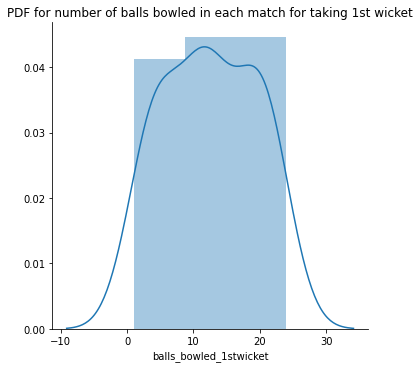

count    38.000000
mean     12.500000
std       6.970013
min       1.000000
25%       5.500000
50%      12.000000
75%      19.000000
max      24.000000
Name: balls_bowled_1stwicket, dtype: float64

In [162]:
#Converting above two lists into dataframe
df_Rashid_ballsbowled_1stwicket =  pd.DataFrame(list(zip(Rashid_matchID, Rashid_balls_bowled)), columns =['match_id', 'balls_bowled_1stwicket']) 
df_Rashid_ballsbowled_1stwicket.head()

#Now plotting PDF 
import seaborn as sns
import matplotlib.pyplot as plt
sns.FacetGrid(df_Rashid_ballsbowled_1stwicket,size=5) \
   .map(sns.distplot, "balls_bowled_1stwicket") \
   .add_legend();

plt.title("PDF for number of balls bowled in each match for taking 1st wicket")
plt.show();

#Printing Mean and Std
df_Rashid_ballsbowled_1stwicket['balls_bowled_1stwicket'].describe()

**Conclusion :-**

By looking at above plot i can say that most of the balls are lies between 10 to 20 and if you observe mean and percentile values 75% of the values lies less than 19 and median is 12. 

So in today match also he will get his first wicket in (10-19) balls. I.e in options it comes under (9-16) balls.

### Q3) How will David warner get out?

In [176]:
df_Warner = df_deliveries[(df_deliveries['batsman'] == 'DA Warner') & (df_deliveries['player_dismissed'] != 'No Wicket')]

df_Warner['dismissal_kind'].value_counts()

caught               69
bowled               23
run out              10
stumped               5
lbw                   4
caught and bowled     2
hit wicket            1
Name: dismissal_kind, dtype: int64

He caught out most of the times.

In [182]:
#Lets see david warner wickets against current RR bowlers.
df_Warner_RR = df_deliveries[(df_deliveries['batsman'] == 'DA Warner') & (df_deliveries['player_dismissed'] != 'No Wicket') &
                             ((df_deliveries['bowler'] == 'J Archer') | (df_deliveries['bowler'] == 'S Gopal') |
                              (df_deliveries['bowler'] == 'BA Stokes') | (df_deliveries['bowler'] == 'R Tewatia'))]

df_Warner_RR['dismissal_kind'].value_counts()

caught    2
Name: dismissal_kind, dtype: int64

**Conclusion :-**

David warner got out only 2 times against current RR bowlers by Caught. His overall dismissals also mostly by caught only. 

So i am predicting he will get out by caught today as well.

### Q4) Who will score most runs for RR in the match?

In [75]:
#First i am grouping matchid and batsman and calculating number of runs scored by each batsman in particular match.
df = df_deliveries[['match_id','batsman','batsman_runs']]
batsman_runs = df.groupby(["match_id", "batsman"])['batsman_runs'].sum()

#Converting series object to dataframe
df_batsman_runs = batsman_runs.to_frame()
df_batsman_runs.reset_index(inplace=True)

#Here calculating which batsman scored most runs in each match in ipl
df_batsman_with_maxruns = df_batsman_runs.loc[df_batsman_runs.groupby("match_id")["batsman_runs"].idxmax()]
df_batsman_with_maxruns.head()


,match_id,batsman,batsman_runs
16,1,Yuvraj Singh,62
29,2,SPD Smith,84
33,3,CA Lynn,93
40,4,BA Stokes,50
58,5,KM Jadhav,69


In [87]:
#Filtering out Current top5 RR batsman from above dataframe
df_RR_batsman = df_batsman_with_maxruns[(df_batsman_with_maxruns['batsman'] == 'JC Buttler') |
                                        (df_batsman_with_maxruns['batsman'] == 'SPD Smith') |
                                        (df_batsman_with_maxruns['batsman'] == 'SV Samson') |
                                        (df_batsman_with_maxruns['batsman'] == 'BA Stokes') |
                                        (df_batsman_with_maxruns['batsman'] == 'RV Uthappa')]
#printing how many times current RR batsman is scored most runs in a match.
print("batsman      Number_of_times_scored_most_runs\n")                                      
print(df_RR_batsman['batsman'].value_counts())                                       


batsman      Number_of_times_scored_most_runs

RV Uthappa    18
SPD Smith      7
SV Samson      6
JC Buttler     3
BA Stokes      2
Name: batsman, dtype: int64


**Conclusion:-**

If you look at the above observation Robin Uthappa has scored most runs in a match highest number of times i.e 18. Robin and Stokes will be opening the batting in this season. As per my cricket knowledge mostly top order batsman will score most runs in match. 

So i am predicting weather Uthappa or stokes will score most runs. 

### Q5) How many No-balls bowled in the match

Basically No-balls bowled in the match dependent on bowlers bowled in that match. Genearlly fast bowlers will bowl more no-balls because of long run up. 

In [208]:
#I am taking 3 bowlers from each team.
df_SRHRR_bowlers = df_deliveries[((df_deliveries['bowler'] == 'S Sharma') | (df_deliveries['bowler'] == 'K Ahmed') |
                                 (df_deliveries['bowler'] == 'Rashid Khan') |
                                 (df_deliveries['bowler'] == 'J Archer') | (df_deliveries['bowler'] == 'S Gopal') |
                                 ((df_deliveries['bowler'] == 'R Tewatia')))] 
print("Number of No-balls bowled by present SRH and RR bowlers is: ",df_SRHRR_bowlers['noball_runs'].sum(),"\n") 
print("Number of balls bowled by present SRH and RR bowlers is: ", df_SRHRR_bowlers.shape[0])

Number of No-balls bowled by present SRH and RR bowlers is:  4 

Number of balls bowled by present SRH and RR bowlers is:  3020


only 4 No-balls out of 3020 balls means they didnt bowled no ball in most number of matches.

In [209]:
#Lets look at how many no-balls they bowled in head-head matches.
df_SRHRR_noball =df_deliveries[((df_deliveries['batting_team'] == 'Sunrisers Hyderabad') & (df_deliveries['bowling_team'] == 'Rajasthan Royals')) |
                            ((df_deliveries['batting_team'] == 'Rajasthan Royals') & (df_deliveries['bowling_team'] == 'Sunrisers Hyderabad'))] 

print("Number of No-balls bowled by SRH and RR teams is: ",df_SRHRR_noball['noball_runs'].sum(),"\n") 
print("Number of balls bowled by SRH and RR teams is: ", df_SRHRR_noball.shape[0])


Number of No-balls bowled by SRH and RR teams is:  3 

Number of balls bowled by SRH and RR teams is:  2661


**Conclusion :-**

Only 3 no-balls conceeded out of 2661 balls bowled by RR and SRH in their head-head matches. This is almost 0 no-balls per match.

So i am predicting in today match also they will bowl 0 no-balls i.e option is (0-1)